In [15]:
from mplsoccer.pitch import Pitch, VerticalPitch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.image as img
from statsbombpy import sb
import matplotlib.patches as mpatches
from matplotlib.colors import to_rgba

import matplotlib.patheffects as path_effects
from matplotlib import rcParams

from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
from sklearn.cluster import KMeans

In [16]:
df = pd.read_csv('~/Documents/Data analysis blog/France v Spain.csv')
pd.set_option('display.max_columns', None)

df['type'] = df['type/displayName']
df['outcome'] = df['outcomeType/displayName']

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*0.8
df['endY'] = df['endY']*0.8

df2 = pd.read_csv('~/Documents/Data analysis blog/France v Spain.csv')
pd.set_option('display.max_columns', None)

df2['type'] = df2['type/displayName']
df2['outcome'] = df2['outcomeType/displayName']

df2['x'] = df2['x']*1.2
df2['endX'] = df2['endX']*1.2
df2['y'] = df2['y']*0.8
df2['endY'] = df2['endY']*0.8

In [17]:
df['number'] = 0

In [18]:
df.loc[df['playerId'] == 14296, 'number'] = 19
df.loc[df['playerId'] == 25604, 'number'] = 1
df.loc[df['playerId'] == 25931, 'number'] = 2
df.loc[df['playerId'] == 44721, 'number'] = 5
df.loc[df['playerId'] == 80241, 'number'] = 7
df.loc[df['playerId'] == 80764, 'number'] = 8
df.loc[df['playerId'] == 84008, 'number'] = 17
df.loc[df['playerId'] == 93206, 'number'] = 4
df.loc[df['playerId'] == 94868, 'number'] = 22
df.loc[df['playerId'] == 97752, 'number'] = 6
df.loc[df['playerId'] == 139186, 'number'] = 21
df.loc[df['playerId'] == 247800, 'number'] = 3
df.loc[df['playerId'] == 259648, 'number'] = 2
df.loc[df['playerId'] == 298839, 'number'] = 21
df.loc[df['playerId'] == 300713, 'number'] = 10
df.loc[df['playerId'] == 301019, 'number'] = 5
df.loc[df['playerId'] == 303115, 'number'] = 22
df.loc[df['playerId'] == 303139, 'number'] = 16
df.loc[df['playerId'] == 332823, 'number'] = 23
df.loc[df['playerId'] == 122117, 'number'] = 19
df.loc[df['playerId'] == 349760, 'number'] = 11
df.loc[df['playerId'] == 353423, 'number'] = 8
df.loc[df['playerId'] == 422937, 'number'] = 9
df.loc[df['playerId'] == 368091, 'number'] = 12

In [19]:
df.loc[df['playerId'] == 14296, 'playerId'] = 'Karim Benzema'
df.loc[df['playerId'] == 25604, 'playerId'] = 'Hugo Lloris'
df.loc[df['playerId'] == 25931, 'playerId'] = 'César Azpilicueta'
df.loc[df['playerId'] == 44721, 'playerId'] = 'Sergio Busquets'
df.loc[df['playerId'] == 80241, 'playerId'] = 'Antoine Griezmann'
df.loc[df['playerId'] == 80764, 'playerId'] = 'Koke'
df.loc[df['playerId'] == 84008, 'playerId'] = 'Marcos Alonso'
df.loc[df['playerId'] == 93206, 'playerId'] = 'Raphaël Varane'
df.loc[df['playerId'] == 94868, 'playerId'] = 'Pablo Sarabia'
df.loc[df['playerId'] == 97752, 'playerId'] = 'Paul Pogba'
df.loc[df['playerId'] == 139186, 'playerId'] = 'Lucas Hernández'
df.loc[df['playerId'] == 247800, 'playerId'] = 'Presnel Kimpembe'
df.loc[df['playerId'] == 259648, 'playerId'] = 'Benjamin Pavard'
df.loc[df['playerId'] == 298839, 'playerId'] = 'Mikel Oyarzabal'
df.loc[df['playerId'] == 300713, 'playerId'] = 'Kylian Mbappé'
df.loc[df['playerId'] == 301019, 'playerId'] = 'Jules Koundé'
df.loc[df['playerId'] == 303115, 'playerId'] = 'Theo Hernández'
df.loc[df['playerId'] == 303139, 'playerId'] = 'Rodri'
df.loc[df['playerId'] == 332823, 'playerId'] = 'Unai Simón'
df.loc[df['playerId'] == 122117, 'playerId'] = 'Aymeric Laporte'
df.loc[df['playerId'] == 349760, 'playerId'] = 'Ferran Torres'
df.loc[df['playerId'] == 353423, 'playerId'] = 'Aurélien Tchouaméni'
df.loc[df['playerId'] == 422937, 'playerId'] = 'Gavi'
df.loc[df['playerId'] == 368091, 'playerId'] = 'Eric Garciá'

df2.loc[df2['playerId'] == 14296, 'playerId'] = 'Karim Benzema'
df2.loc[df2['playerId'] == 25604, 'playerId'] = 'Hugo Lloris'
df2.loc[df2['playerId'] == 25931, 'playerId'] = 'César Azpilicueta'
df2.loc[df2['playerId'] == 44721, 'playerId'] = 'Sergio Busquets'
df2.loc[df2['playerId'] == 80241, 'playerId'] = 'Antoine Griezmann'
df2.loc[df2['playerId'] == 80764, 'playerId'] = 'Koke'
df2.loc[df2['playerId'] == 84008, 'playerId'] = 'Marcos Alonso'
df2.loc[df2['playerId'] == 93206, 'playerId'] = 'Raphaël Varane'
df2.loc[df2['playerId'] == 94868, 'playerId'] = 'Pablo Sarabia'
df2.loc[df2['playerId'] == 97752, 'playerId'] = 'Paul Pogba'
df2.loc[df2['playerId'] == 139186, 'playerId'] = 'Lucas Hernández'
df2.loc[df2['playerId'] == 247800, 'playerId'] = 'Presnel Kimpembe'
df2.loc[df2['playerId'] == 259648, 'playerId'] = 'Benjamin Pavard'
df2.loc[df2['playerId'] == 298839, 'playerId'] = 'Mikel Oyarzabal'
df2.loc[df2['playerId'] == 300713, 'playerId'] = 'Kylian Mbappé'
df2.loc[df2['playerId'] == 301019, 'playerId'] = 'Jules Koundé'
df2.loc[df2['playerId'] == 303115, 'playerId'] = 'Theo Hernández'
df2.loc[df2['playerId'] == 303139, 'playerId'] = 'Rodri'
df2.loc[df2['playerId'] == 332823, 'playerId'] = 'Unai Simón'
df2.loc[df2['playerId'] == 122117, 'playerId'] = 'Aymeric Laporte'
df2.loc[df2['playerId'] == 349760, 'playerId'] = 'Ferran Torres'
df2.loc[df2['playerId'] == 353423, 'playerId'] = 'Aurélien Tchouaméni'
df2.loc[df2['playerId'] == 422937, 'playerId'] = 'Gavi'
df2.loc[df2['playerId'] == 368091, 'playerId'] = 'Eric Garciá'

In [20]:
df.loc[df['teamId'] == 338, 'teamId'] = 'Spain'
df.loc[df['teamId'] == 341, 'teamId'] = 'France'
df = df[df['teamId'] == 'Spain']

df2.loc[df2['teamId'] == 338, 'teamId'] = 'Spain'
df2.loc[df2['teamId'] == 341, 'teamId'] = 'France'
df2 = df2[df2['teamId'] == 'France']

In [21]:
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

#find passes and then only look for the successful passes
passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']

passes['beginning'] = df.apply(lambda row: np.sqrt(np.square(120 - row.x) + np.square(40 - row.y)), axis=1)
#successful.loc[beginning] = np.sqrt(np.square(120 - successful['x']) + np.square(40 - successful['y']))
passes['end'] = np.sqrt(np.square(120 - passes['endX']) + np.square(40 - passes['endY']))
passes['progressive'] = (passes['end'] / passes['beginning']) < 0.75
#successful['progressive'] = [(successful['end'][x]) / (successful['beginning'][x]) < .75 for x in range(len(successful.beginning))]

#find the first subsititution and filter the successful dataframe to be less than that minute
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

successful = successful[successful['minute'] < firstSub]

df2['passer'] = df2['playerId']
df2['recipient'] = df2['playerId'].shift(-1)

#find passes and then only look for the successful passes
passes2 = df2[df2['type']=='Pass']
successful2 = passes2[passes2['outcome']=='Successful']

passes2['beginning'] = df2.apply(lambda row: np.sqrt(np.square(120 - row.x) + np.square(40 - row.y)), axis=1)
passes2['end'] = np.sqrt(np.square(120 - passes2['endX']) + np.square(40 - passes2['endY']))
passes2['progressive'] = (passes2['end'] / passes2['beginning']) < 0.75

#find the first subsititution and filter the successful dataframe to be less than that minute
subs2 = df2[df2['type']=='SubstitutionOff']
subs2 = subs2['minute']
firstSub2 = subs2.min()
secondSub = 79

successful2 = successful2[successful2['minute'] < firstSub2]

<ipython-input-21-a501bc13fcc1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['beginning'] = df.apply(lambda row: np.sqrt(np.square(120 - row.x) + np.square(40 - row.y)), axis=1)
<ipython-input-21-a501bc13fcc1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['end'] = np.sqrt(np.square(120 - passes['endX']) + np.square(40 - passes['endY']))
<ipython-input-21-a501bc13fcc1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [22]:
## PASS SONAR ####################

successful["distance"] = np.sqrt(
  (abs(
    successful["endX"] - successful["x"]
  ) ** 2 + abs(
  successful["endY"] - successful["y"]
  ) ** 2).values
)

In [23]:
from numpy import linalg as LA

def calc_degree(x, y, endX, endY):
  u = np.array([x - x, 120 - y])
  v = np.array([endX - x, endY - y])
  i = np.inner(u, v)
  n = LA.norm(u) * LA.norm(v)
  c = i / n
  a = np.rad2deg(np.arccos(np.clip(c, -1.0, 1.0)))
    
  if endX - x < 0:
    a = 360 - a
    
  return a

def calc_pass_theta(row):
  return round(
    calc_degree(
      row["x"]
      ,row["y"]
      ,row["endX"]
      ,row["endY"]
    )
  )

#Apply function each row
successful["angle"] = successful.apply(
  calc_pass_theta
  ,axis=1
)

In [24]:
def divide(angle, divisions):
  degree = 360 / divisions
  division = ((angle + (degree / 2)) // degree) + 1
  if division > angle:
    division = 1
  return division

def divide_pass_direction(row):
  return divide(
    row["angle"]
    ,8
  )

successful["direction"] = successful.apply(
  divide_pass_direction
  ,axis=1
)

In [25]:
successful = successful.replace({"direction": {9: 1}})

In [26]:
pass_sonar = successful.groupby(["playerId", "direction"], as_index=False)
pass_sonar = pass_sonar.agg({"distance": "mean", "eventId": "count"})
pass_sonar = pass_sonar.rename(columns={"eventId": "amount"})

average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

average_locations['player'] = ''
average_locations['player'][0] = 'Aymeric Laporte'
average_locations['player'][1] = 'César Azpilicueta'
average_locations['player'][2] = 'Eric Garciá'
average_locations['player'][3] = 'Ferran Torres'
average_locations['player'][4] = 'Gavi'
average_locations['player'][5] = 'Marcos Alonso'
average_locations['player'][6] = 'Mikel Oyarzabal'
average_locations['player'][7] = 'Pablo Sarabia'
average_locations['player'][8] = 'Rodri'
average_locations['player'][9] = 'Sergio Busquets'
average_locations['player'][10] = 'Unai Simón'
average_locations

<ipython-input-26-227021a71a25>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_locations['player'][0] = 'Aymeric Laporte'
<ipython-input-26-227021a71a25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_locations['player'][1] = 'César Azpilicueta'
<ipython-input-26-227021a71a25>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_locations['player'][2] = 'Eric Garciá'
<ipython-input-26-227021a71a25>:12: Setting

x          y  count             player
passer                                                           
Aymeric Laporte    37.028571  57.102857     42    Aymeric Laporte
César Azpilicueta  57.760000  12.585455     66  César Azpilicueta
Eric Garciá        38.419535  28.967442     43        Eric Garciá
Ferran Torres      76.932414  11.398621     29      Ferran Torres
Gavi               68.132308  17.476923     26               Gavi
Marcos Alonso      65.100000  70.450667     60      Marcos Alonso
Mikel Oyarzabal    66.594000  48.540000     20    Mikel Oyarzabal
Pablo Sarabia      73.480000  68.586667      9      Pablo Sarabia
Rodri              57.808696  54.831304     46              Rodri
Sergio Busquets    54.178824  38.737255     51    Sergio Busquets
Unai Simón         11.856000  39.152000     20         Unai Simón

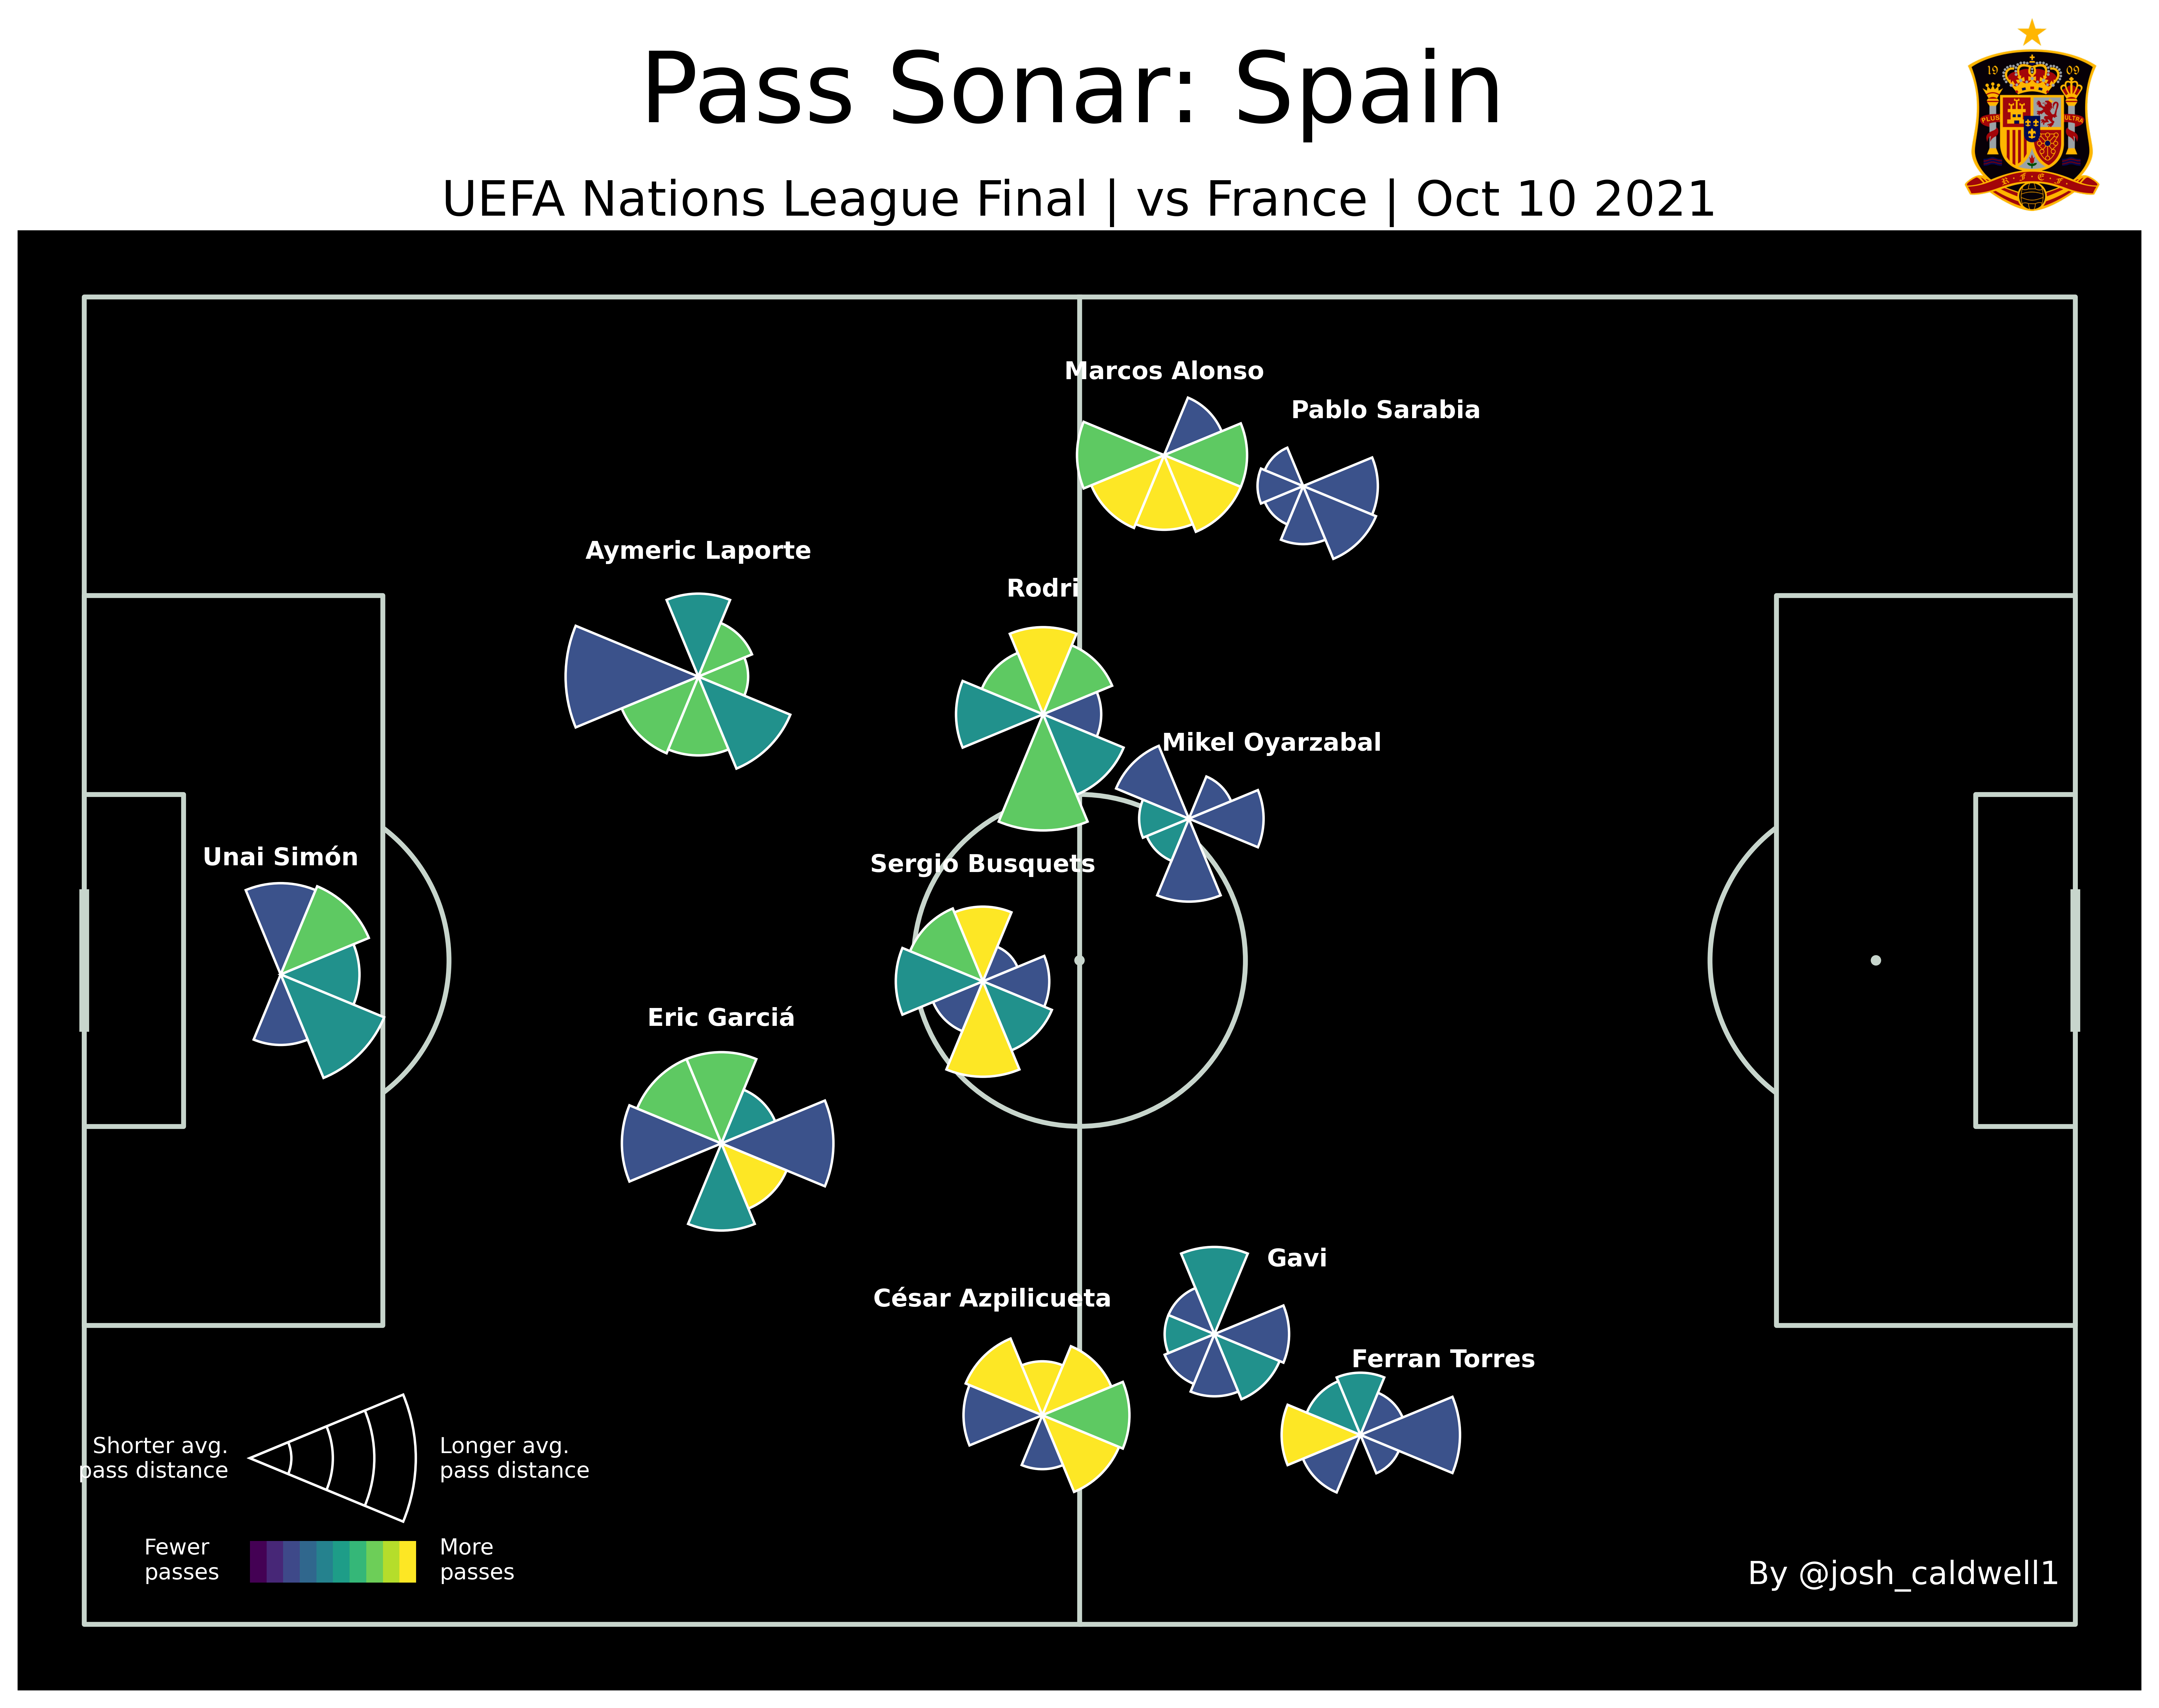

In [138]:
fig, ax = plt.subplots(figsize=(16,11), dpi=600)
fig.patch.set_facecolor('white')

plt.suptitle('Pass Sonar: Spain', color='black', size=40, 
             ha='center', va='center', x=0.51, y=0.95)
plt.title('UEFA Nations League Final | vs France | Oct 10 2021', size=20)

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', 
              pitch_color='black', line_color='#c7d5cc', figsize=(16,11),
              constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)
ax.invert_yaxis()

for _, player in average_locations.iterrows():
    if player.player == 'Aymeric Laporte' or player.player == "Eric Garciá" or player.player == "Rodri":
        ax.text(
            player.x
            ,player.y + 7.5
            ,player.player
            ,ha="center"
            ,va='center'
            ,color='white'
            ,weight='bold'
          )
    elif player.player == 'Unai Simón' or player.player == "Sergio Busquets":
        ax.text(
            player.x
            ,player.y + 7
            ,player.player
            ,ha="center"
            ,va='center'
            ,color='white'
            ,weight='bold'
          )
    elif player.player == 'César Azpilicueta':
        ax.text(
            player.x - 3
            ,player.y + 7
            ,player.player
            ,ha="center"
            ,va='center'
            ,color='white'
            ,weight='bold'
          )
    elif player.player == 'Marcos Alonso':
        ax.text(
            player.x
            ,player.y + 5
            ,player.player
            ,ha="center"
            ,va='center'
            ,color='white'
            ,weight='bold'
          )  
    else:
        ax.text(
        player.x + 5
        ,player.y + 4.5
        ,player.player
        ,ha="center"
        ,va='center'
        ,color='white'
        ,weight='bold'
      )
  
    for _, pass_detail in pass_sonar[pass_sonar.playerId == player.player].iterrows():
        #Start degree of direction 1
        theta_left_start = 112.5
    
        #Color coding by distance
        if pass_detail.amount < 2:
          color = '#440154'
        if pass_detail.amount < 4:
          color = '#3b528b'
        elif pass_detail.amount < 7:
          color = '#21918c'
        elif pass_detail.amount < 10:
          color = '#5ec962'
        else:
          color = '#fde725'
        #Calculate degree in matplotlib figure
        theta_left = theta_left_start - (360 / 8) * (pass_detail.direction - 1)
        theta_right = theta_left - (360 / 8)
        pass_wedge = mpatches.Wedge(
          center=(player.x, player.y)
          ,r=int(pass_detail.distance)*0.25
          ,theta1=theta_right
          ,theta2=theta_left
          ,facecolor=color
          ,edgecolor='white'
        )
        ax.add_patch(pass_wedge)
        
gradient = np.linspace(0, 1, 10)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='equal', cmap=plt.get_cmap('viridis'), origin='lower', extent=[10, 20, 2.5, 5])
fig.text(x=0.285, y=0.1825, s='More\npasses', color='white', size=9)
fig.text(x=0.18, y=0.1825, s='Fewer\npasses', color='white', size=9)

theta_left = theta_left_start - (360 / 8) * 2
theta_right = theta_left - (360 / 8)
pass_wedge = mpatches.Wedge(
    center=(10, 10)
    ,r=10
    ,theta1=theta_right
    ,theta2=theta_left
    ,facecolor='black'
    ,edgecolor='white'
)
ax.add_patch(pass_wedge)

theta_left = theta_left_start - (360 / 8) * 2
theta_right = theta_left - (360 / 8)
pass_wedge = mpatches.Wedge(
    center=(10, 10)
    ,r=7.5
    ,theta1=theta_right
    ,theta2=theta_left
    ,facecolor='black'
    ,edgecolor='white'
)
ax.add_patch(pass_wedge)

theta_left = theta_left_start - (360 / 8) * 2
theta_right = theta_left - (360 / 8)
pass_wedge = mpatches.Wedge(
    center=(10, 10)
    ,r=5
    ,theta1=theta_right
    ,theta2=theta_left
    ,facecolor='black'
    ,edgecolor='white'
)
ax.add_patch(pass_wedge)

theta_left = theta_left_start - (360 / 8) * 2
theta_right = theta_left - (360 / 8)
pass_wedge = mpatches.Wedge(
    center=(10, 10)
    ,r=2.5
    ,theta1=theta_right
    ,theta2=theta_left
    ,facecolor='black'
    ,edgecolor='white'
)
ax.add_patch(pass_wedge)

fig.text(x=0.285, y=0.235, s='Longer avg.\npass distance', color='white', size=9)
fig.text(x=0.21, y=0.235, s='Shorter avg.\npass distance', color='white', size=9, ha='right')


# Logo
im =img.imread('spain.png')


# Place the image in the upper-right corner of the figure
#--------------------------------------------------------
# We're specifying the position and size in _figure_ coordinates, so the image
# will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# image in front of the axes.
newax = fig.add_axes([0.775, 0.89, 0.1, 0.1], anchor='NE', zorder=1)

newax.imshow(im)

newax.axis('off')

## Legend
#short_patch = mpatches.Patch(color='#440154', label='Passes < 10')
#med_patch = mpatches.Patch(color='#3b528b', label='Passes < 15')
#long_patch = mpatches.Patch(color='#21918c', label='Passes < 20')
#longest_patch = mpatches.Patch(color='#5ec962', label='Passes < 25')
#distance_patch = mpatches.Patch(color='#5ec962', label='Passes > 25')
#plt.legend(handles=[short_patch, med_patch, long_patch, longest_patch, distance_patch])

fig.text(x=0.75, y=0.18, s='By @josh_caldwell1', color='white', size=13)

fig.savefig("Spain v France pass sonar2.png", dpi=600, bbox_inches = "tight") ####### CHANGE NAME HERE #######
plt.show()

In [110]:
#now we need to find the average locations and counts of the passes
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

#now we need to find the number of passes between each player
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])


#now we need to find the average locations and counts of the passes ###############################
average_locations2 = successful2.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations2.columns = ['x','y','count']

#now we need to find the number of passes between each player
pass_between2 = successful2.groupby(['passer','recipient']).id.count().reset_index()
pass_between2.rename({'id':'pass_count'},axis='columns',inplace=True)

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between2 = pass_between2.merge(average_locations2, left_on='passer',right_index=True)
pass_between2 = pass_between2.merge(average_locations2, left_on='recipient',right_index=True,suffixes=['', '_end'])

In [42]:
#set minimum threshold of combinations.. I like 5 for high passing teams. 2 or 3 for low passing.
pass_between = pass_between[pass_between['pass_count']>5]

pass_between2 = pass_between2[pass_between2['pass_count']>2]

In [43]:
MAX_LINE_WIDTH = 12
MAX_MARKER_SIZE = 1000
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locations['marker_size'] = (average_locations['count']
                                         / average_locations['count'].max() * MAX_MARKER_SIZE)

MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency


MAX_LINE_WIDTH = 12
MAX_MARKER_SIZE = 1000
pass_between2['width'] = (pass_between2.pass_count / pass_between2.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locations2['marker_size'] = (average_locations2['count']
                                         / average_locations2['count'].max() * MAX_MARKER_SIZE)

MIN_TRANSPARENCY = 0.3
color2 = np.array(to_rgba('white'))
color2 = np.tile(color2, (len(pass_between2), 1))
c_transparency2 = pass_between2.pass_count / pass_between2.pass_count.max()
c_transparency2 = (c_transparency2 * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color2[:, 3] = c_transparency2

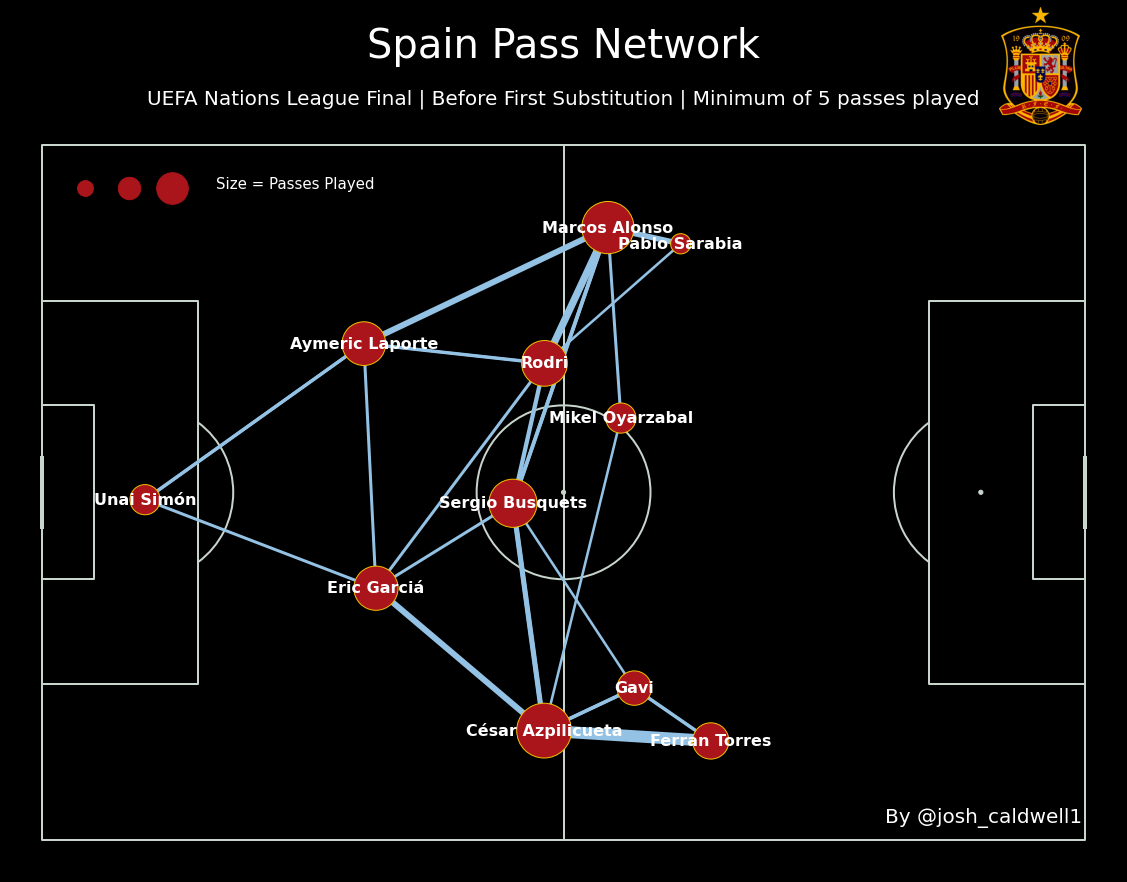

In [513]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='black', line_color='#c7d5cc')

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("black")
plt.gca().invert_yaxis()
pass_lines = pitch.lines(pass_between.x, pass_between.y,
                         pass_between.x_end, pass_between.y_end, lw=pass_between.width,
                         color='#94C2E4', zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locations.x, average_locations.y,
                           s=average_locations.marker_size * 3,
                           color='#aa151b', edgecolors='#f1bf00', linewidth=1, alpha=1, ax=ax)
for index, row in average_locations.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)
plt.suptitle('Spain Pass Network\n', c='white', size=40, y=1.075)
plt.title(label='UEFA Nations League Final | Before First Substitution | Minimum of 5 passes played', 
          color='white', size=20)

plt.text(s='By @josh_caldwell1', color='white', size=20, x=97, y=2)

plt.scatter(x=5, y=75, color='#aa151b', s=250)
plt.scatter(x=10, y=75, color='#aa151b', s=500)
plt.scatter(x=15, y=75, color='#aa151b', s=1000)
plt.text(s='Size = Passes Played', x=20, y=75, color='white', size=15)
#plt.text(s='Minimum of 5 passes', x=2, y=2, color='white', size=20)

# Logo
im =img.imread('spain.png')


# Place the image in the upper-right corner of the figure
#--------------------------------------------------------
# We're specifying the position and size in _figure_ coordinates, so the image
# will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# image in front of the axes.
newax = fig.add_axes([0.8, 0.95, 0.15, 0.15], anchor='NE', zorder=1)

newax.imshow(im)

newax.axis('off')

#fig.savefig("Spain pass network.png", dpi=600, bbox_inches = "tight") ####### CHANGE NAME HERE #######
plt.show()

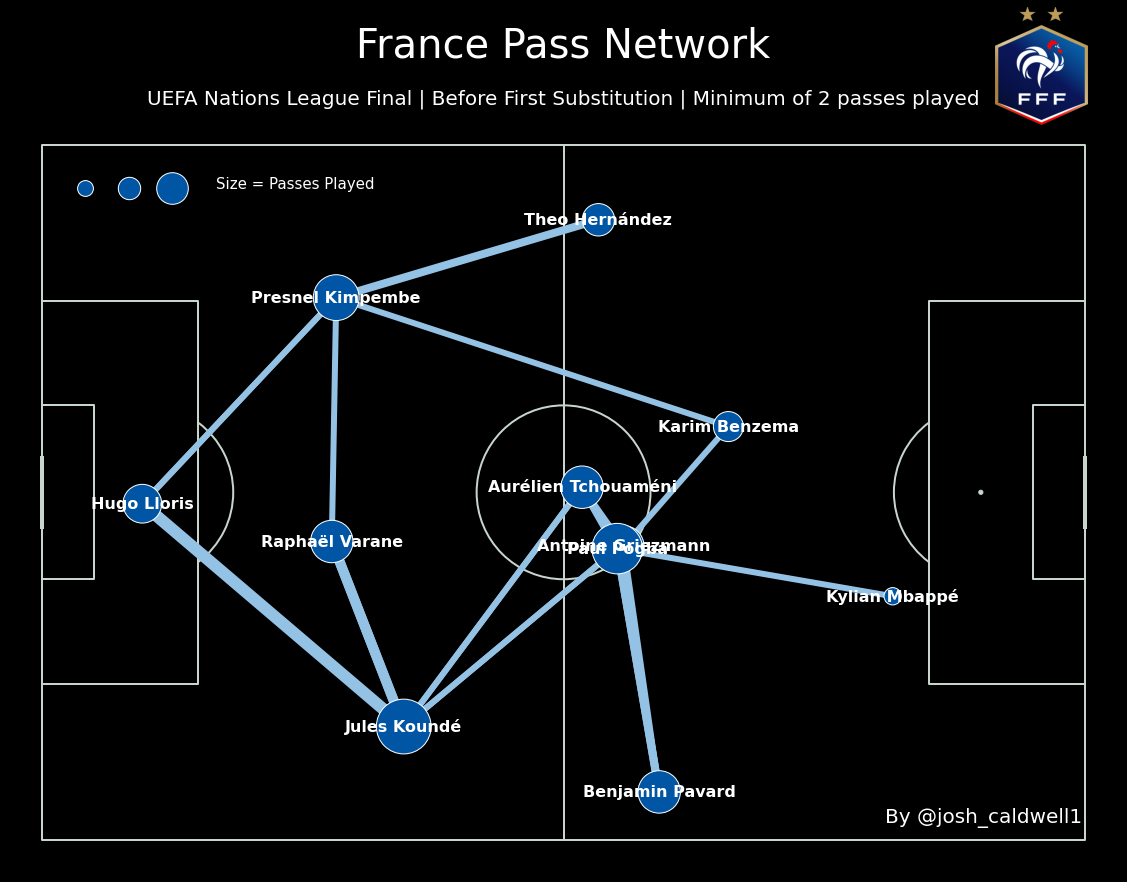

In [514]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='black', line_color='#c7d5cc')

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("black")
plt.gca().invert_yaxis()
pass_lines = pitch.lines(pass_between2.x, pass_between2.y,
                         pass_between2.x_end, pass_between2.y_end, lw=pass_between2.width,
                         color='#94C2E4', zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locations2.x, average_locations2.y,
                           s=average_locations2.marker_size * 3,
                           color='#0055A4', edgecolors='#FFFFFF', linewidth=1, alpha=1, ax=ax)
for index, row in average_locations2.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)
plt.suptitle('France Pass Network\n', c='white', size=40, y=1.075)
plt.title(label='UEFA Nations League Final | Before First Substitution | Minimum of 2 passes played', 
          color='white', size=20)

plt.text(s='By @josh_caldwell1', color='white', size=20, x=97, y=2)

plt.scatter(x=5, y=75, color='#0055A4', s=250, edgecolors='#FFFFFF')
plt.scatter(x=10, y=75, color='#0055A4', s=500, edgecolors='#FFFFFF')
plt.scatter(x=15, y=75, color='#0055A4', s=1000, edgecolors='#FFFFFF')
plt.text(s='Size = Passes Played', x=20, y=75, color='white', size=15)
#plt.text(s='Minimum of 5 passes', x=2, y=2, color='white', size=20)

# Logo
im =img.imread('France.png')


# Place the image in the upper-right corner of the figure
#--------------------------------------------------------
# We're specifying the position and size in _figure_ coordinates, so the image
# will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# image in front of the axes.
newax = fig.add_axes([0.83, 0.95, 0.125, 0.15], anchor='NE', zorder=1)

newax.imshow(im)

newax.axis('off')
#fig.savefig("France pass network.png", dpi=600, bbox_inches = "tight") ####### CHANGE NAME HERE #######

plt.show()

In [531]:
df1 = df.loc[df['teamId']=='Spain']
#now we want to find our passes and recipients and then filter for only passes
df1['passer'] = df1['playerId']
df1['recipient'] = df1['playerId'].shift(-1)

df1 = df1.loc[(df1['playerId'] == 'Sergio Busquets') | ((df1['recipient'] == 'Sergio Busquets') & (df1['type'] == 'Pass'))]
df1 = df1[df1.outcome == 'Successful']

tackles = df1.loc[df1['type'] == 'Tackle']
ints = df1.loc[df1['type'] == 'Interception']
aerials = df1.loc[df1['type'] == 'Aerial']
clearances = df1.loc[df1['type'] == 'Clearance']
recovery = df1.loc[df1['type'] == 'BallRecovery']
blocks = df1.loc[df1['type'] == 'BlockedPass']

In [532]:
df1.type.value_counts()

Pass             135
BallRecovery       7
Aerial             3
Tackle             2
Foul               2
Dispossessed       1
MissedShots        1
CornerAwarded      1
Interception       1
BlockedPass        1
SavedShot          1
TakeOn             1
Name: type, dtype: int64

In [533]:
#df1 = df1[(df1['type'] != 'Clearance')]
#df1 = df1[(df1['type'] != 'Tackle')]
#df1 = df1[(df1['type'] != 'Foul')]
#df1 = df1[(df1['type'] != 'SubstitutionOff')]
#df1 = df1[(df1['type'] != 'BallRecovery')]
#df1 = df1[(df1['type'] != 'MissedShots')]
#df1 = df1[(df1['type'] != 'Dispossessed')]
#df1 = df1[(df1['type'] != 'SavedShot')]
#df1 = df1[(df1['type'] != 'Aerial')]
#df1 = df1[(df1['type'] != 'CornerAwarded')]
#df1 = df1[(df1['type'] != 'Interception')]
#df1 = df1[(df1['type'] != 'BlockedPass')]
df1 = df1[(df1['type'] == 'Pass')]

busquets = passes.loc[(passes['passer'] == 'Sergio Busquets') & (passes['outcome'] == 'Successful')]

mask = ((df1['type'] == 'Pass') & (df1['recipient'] == 'Sergio Busquets') & (df1['passer'] != 'Sergio Busquets') 
        & (df1['outcome'] == 'Successful'))
df1['x'][mask] = df1['endX']
df1['y'][mask] = df1['endY']

In [534]:
df1 = df1[(df1['passer'] != df1['recipient'])]
df1

id  eventId  minute  second teamId       x      y  \
11    2341010359       13       0    48.0  Spain   66.84  20.48   
40    2341010521       31       2     7.0  Spain   30.24  24.48   
41    2341010527       32       2     9.0  Spain   28.44  21.60   
43    2341010557       34       2    18.0  Spain   35.52  52.64   
44    2341010559       35       2    24.0  Spain   54.60  44.32   
...          ...      ...     ...     ...    ...     ...    ...   
1565  2341023653      983      93    11.0  Spain   68.64  30.16   
1586  2341023799      998      94    11.0  Spain   81.36  24.96   
1587  2341023809      999      94    11.0  Spain   81.36  24.96   
1588  2341023819     1000      94    16.0  Spain   87.48  20.64   
1598  2341023905     1007      94    45.0  Spain  108.84  34.96   

      expandedMinute  period/value period/displayName  type/value  \
11                 0             1          FirstHalf           1   
40                 2             1          FirstHalf           1   
41                 2             1          FirstHalf           1   
43                 2             1          FirstHalf           1   
44                 2             1          FirstHalf           1   
...              ...           ...                ...         ...   
1565              96             2         SecondHalf           1   
1586              97             2         SecondHalf           1   
1587              97             2         SecondHalf           1   
1588              97             2         SecondHalf           1   
1598              97             2         SecondHalf           1   

     type/displayName  outcomeType/value outcomeType/displayName  isTouch  \
11               Pass                  1              Successful     True   
40               Pass                  1              Successful     True   
41               Pass                  1              Successful     True   
43               Pass                  1              Successful     True   
44               Pass                  1              Successful     True   
...               ...                ...                     ...      ...   
1565             Pass                  1              Successful     True   
1586             Pass                  1              Successful     True   
1587             Pass                  1              Successful     True   
1588             Pass                  1              Successful     True   
1598             Pass                  1              Successful     True   

             playerId  qualifiers/0/type/value qualifiers/0/type/displayName  \
11    Sergio Busquets                    212.0                        Length   
40      Ferran Torres                    212.0                        Length   
41    Sergio Busquets                    212.0                        Length   
43    Aymeric Laporte                    212.0                        Length   
44    Sergio Busquets                    140.0                      PassEndX   
...               ...                      ...                           ...   
1565  Sergio Busquets                    212.0                        Length   
1586  Mikel Oyarzabal                    212.0                        Length   
1587  Sergio Busquets                    212.0                        Length   
1588      Eric Garciá                    141.0                      PassEndY   
1598           403865                    140.0                      PassEndX   

     qualifiers/0/value  qualifiers/1/type/value  \
11                  9.2                    141.0   
40                  5.0                    141.0   
41                 20.7                    140.0   
43                 13.5                    140.0   
44                 47.3                    212.0   
...                 ...                      ...   
1565               22.0                    141.0   
1586                7.4                    141.0   
1587               15.2   

In [535]:
prog = busquets.loc[(busquets['progressive'] == True) & (busquets['outcome'] == 'Successful')]
busquets = busquets[busquets['progressive'] != True]

In [544]:
df1[df1.endY > 80]

Empty DataFrame
Columns: [id, eventId, minute, second, teamId, x, y, expandedMinute, period/value, period/displayName, type/value, type/displayName, outcomeType/value, outcomeType/displayName, isTouch, playerId, qualifiers/0/type/value, qualifiers/0/type/displayName, qualifiers/0/value, qualifiers/1/type/value, qualifiers/1/type/displayName, qualifiers/1/value, qualifiers/2/type/value, qualifiers/2/type/displayName, qualifiers/2/value, qualifiers/3/type/value, qualifiers/3/type/displayName, qualifiers/3/value, qualifiers/4/type/value, qualifiers/4/type/displayName, qualifiers/4/value, satisfiedEventsTypes/0, satisfiedEventsTypes/1, satisfiedEventsTypes/2, satisfiedEventsTypes/3, satisfiedEventsTypes/4, satisfiedEventsTypes/5, satisfiedEventsTypes/6, endX, endY, qualifiers/5/type/value, qualifiers/5/type/displayName, qualifiers/6/type/value, qualifiers/6/type/displayName, qualifiers/6/value, satisfiedEventsTypes/7, qualifiers/5/value, satisfiedEventsTypes/8, satisfiedEventsTypes/9, qualifiers/7/type/value, qualifiers/7/type/displayName, qualifiers/8/type/value, qualifiers/8/type/displayName, qualifiers/8/value, qualifiers/9/type/value, qualifiers/9/type/displayName, qualifiers/9/value, qualifiers/10/type/value, qualifiers/10/type/displayName, satisfiedEventsTypes/10, qualifiers/7/value, satisfiedEventsTypes/11, satisfiedEventsTypes/12, relatedEventId, relatedPlayerId, qualifiers/10/value, qualifiers/11/type/value, qualifiers/11/type/displayName, qualifiers/12/type/value, qualifiers/12/type/displayName, qualifiers/12/value, blockedX, blockedY, goalMouthZ, goalMouthY, isShot, qualifiers/13/type/value, qualifiers/13/type/displayName, qualifiers/13/value, cardType/value, cardType/displayName, satisfiedEventsTypes/13, satisfiedEventsTypes/14, satisfiedEventsTypes/15, satisfiedEventsTypes/16, isGoal, qualifiers/11/value, type, outcome, number, passer, recipient]
Index: []

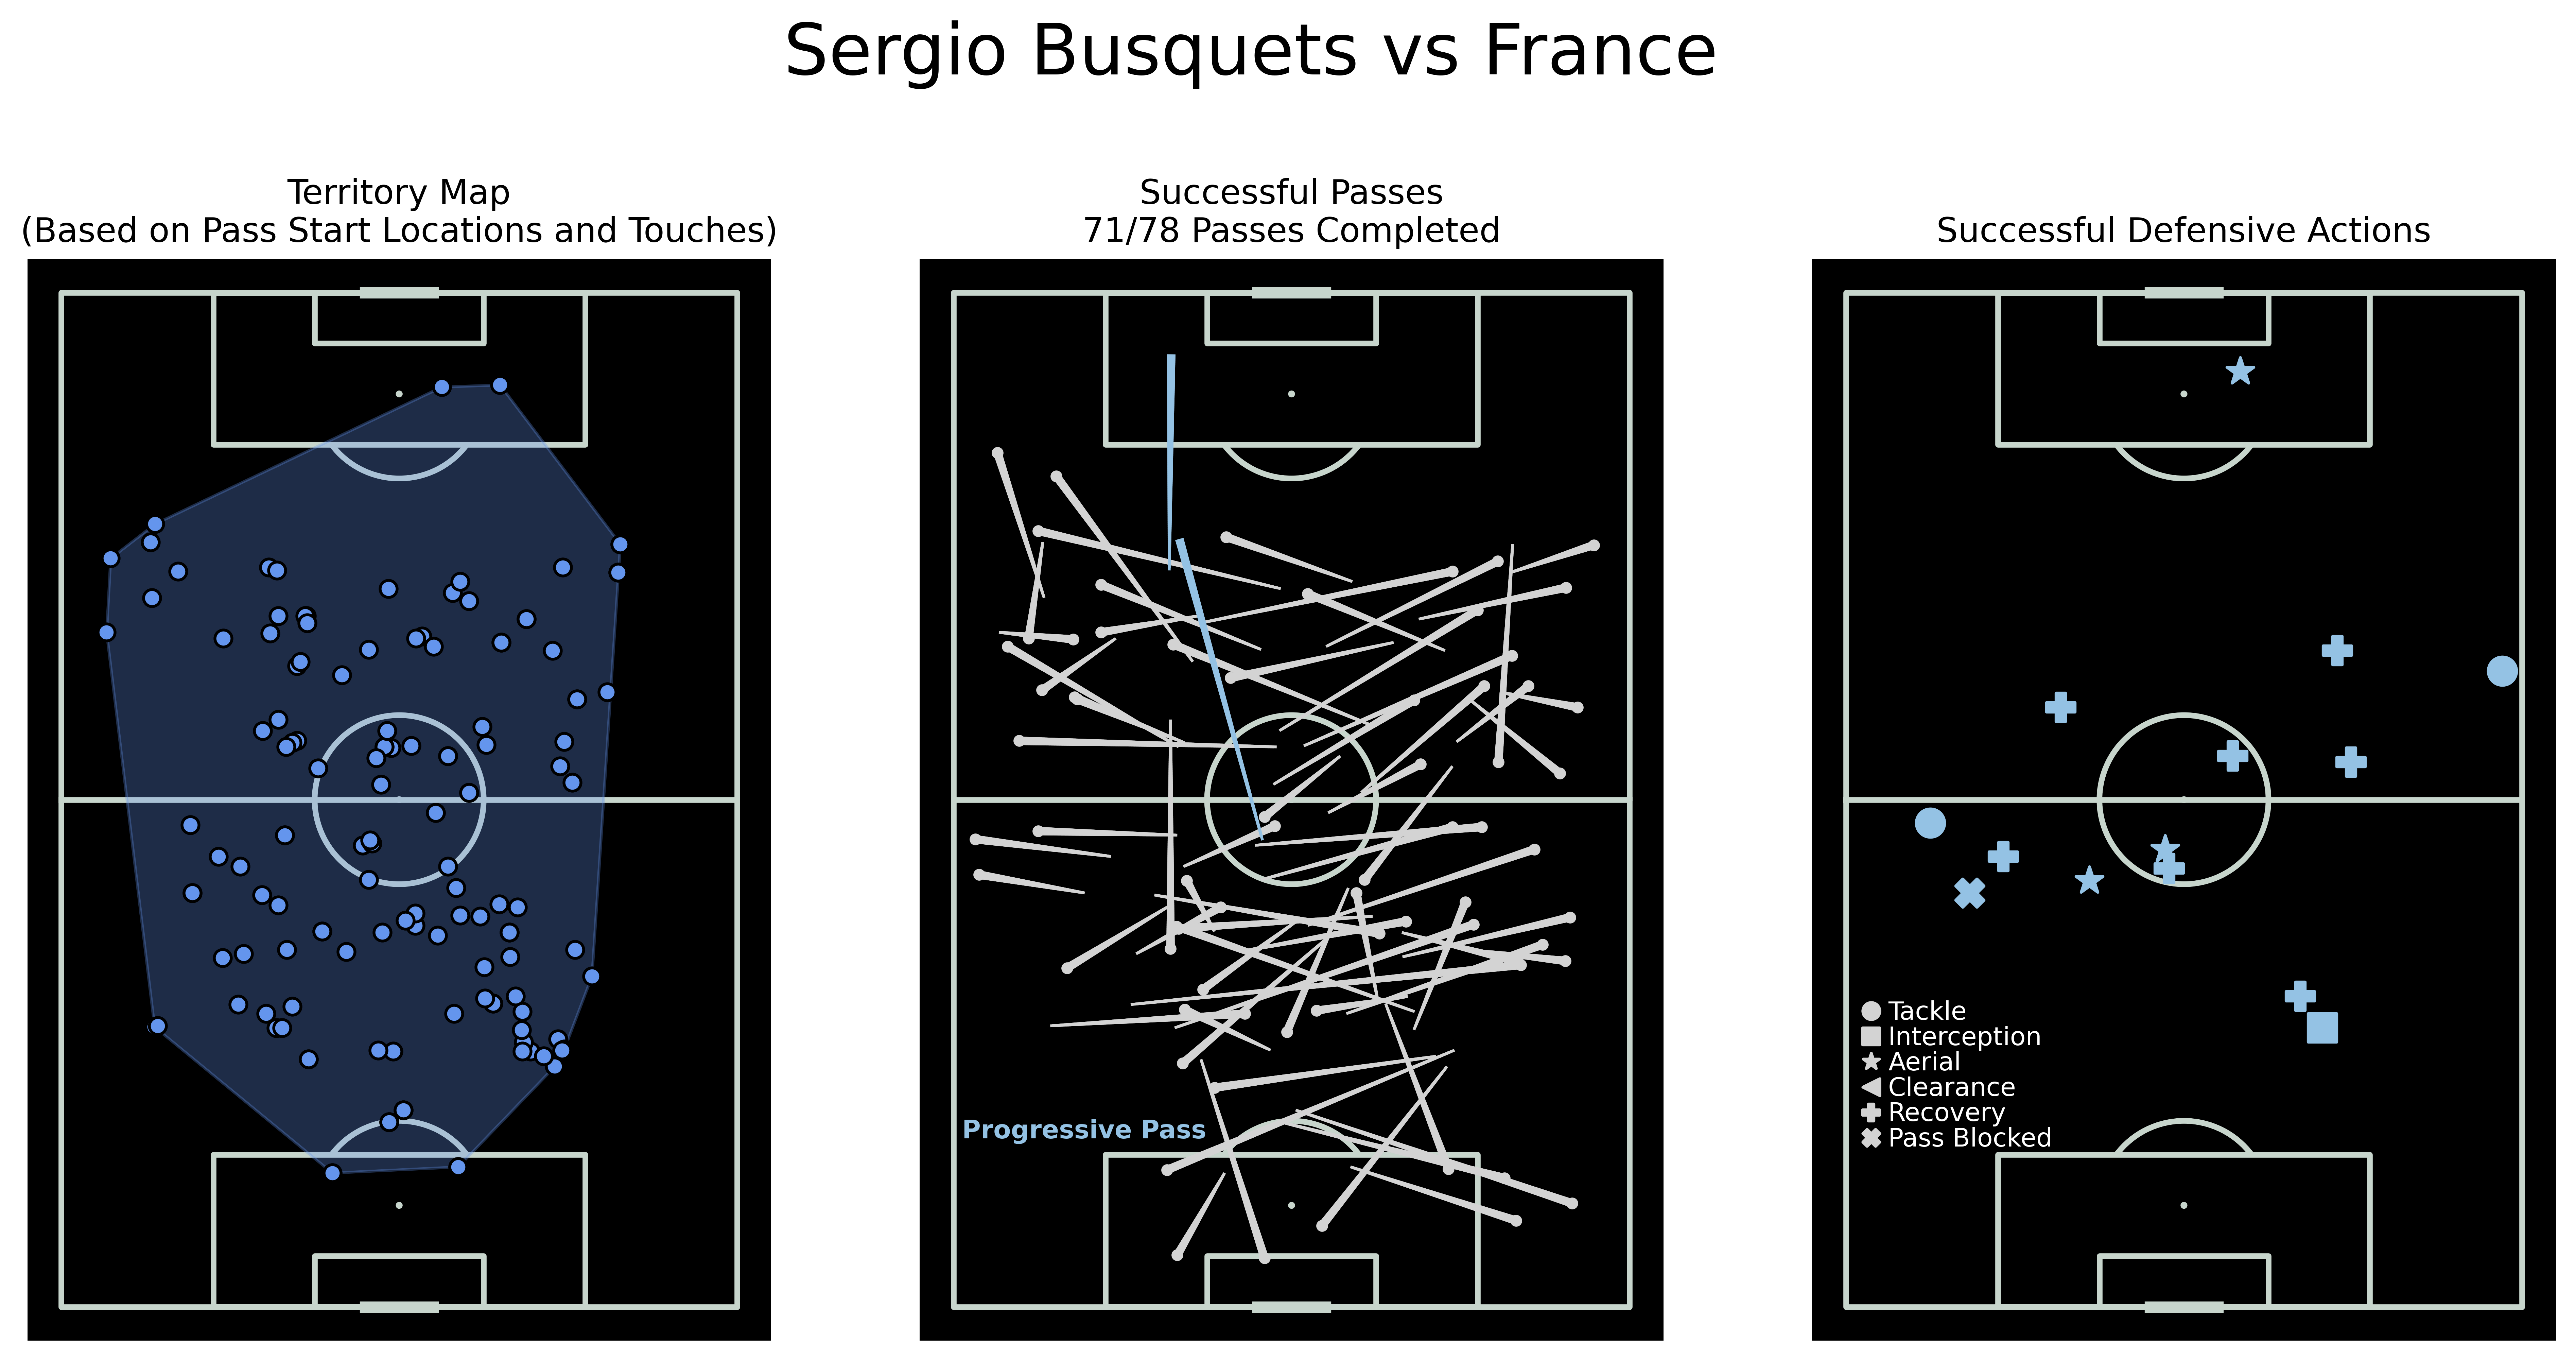

In [560]:
fig, axs = plt.subplots(1, 3, figsize=(16,11), dpi=600)
fig.patch.set_facecolor('white')

plt.suptitle('Sergio Busquets vs France', color='black', size=25, 
             ha='center', va='top', y=0.85)

pitch = VerticalPitch(pitch_type='statsbomb', orientation='horizontal', 
              pitch_color='black', line_color='#c7d5cc', figsize=(16,11),
              constrained_layout=True, tight_layout=False)

pitch.draw(ax=axs[0])
axs[0].invert_xaxis()
axs[0].title.set_text('Territory Map\n(Based on Pass Start Locations and Touches)')
hull = pitch.convexhull(df1.x, df1.y)
poly = pitch.polygon(hull, ax=axs[0], edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)
scatter = pitch.scatter(df1.x, df1.y, ax=axs[0], edgecolor='black', facecolor='cornflowerblue')

pitch.draw(ax=axs[1])
axs[1].invert_xaxis()
axs[1].title.set_text('Successful Passes\n71/78 Passes Completed')
pitch.lines(busquets.x, busquets.y, busquets.endX, busquets.endY, ax=axs[1], color='#D3D3D3', lw=3, comet=True)
pitch.scatter(busquets.endX, busquets.endY, ax=axs[1], color='#D3D3D3', s=10)
pitch.lines(prog.x, prog.y, prog.endX, prog.endY, ax=axs[1], color='#94C2E4', lw=3, comet=True)
axs[1].text(x=79, y=20,s='Progressive Pass', color='#94C2E4', size=9, weight='bold')


pitch.draw(ax=axs[2])
axs[2].invert_xaxis()
axs[2].title.set_text('Successful Defensive Actions')
pitch.scatter(tackles.x, tackles.y, ax=axs[2], s=100, color='#94C2E4')
pitch.scatter(ints.x, ints.y, marker='s', ax=axs[2], s=100, color='#94C2E4')
pitch.scatter(aerials.x, aerials.y, marker='*', ax=axs[2], s=100, color = '#94C2E4')
pitch.scatter(clearances.x, clearances.y, marker='<', ax=axs[2], s=100, color = '#94C2E4')
pitch.scatter(recovery.x, recovery.y, marker='P', ax=axs[2], s=100, color = '#94C2E4')
pitch.scatter(blocks.x, blocks.y, marker='X', ax=axs[2], s=100, color = '#94C2E4')

axs[2].scatter(x=77, y=35, color='#D3D3D3')
axs[2].text(x=75, y=34,s='Tackle', color='white', size=9)
axs[2].scatter(x=77, y=32, color='#D3D3D3', marker='s')
axs[2].text(x=75, y=31,s='Interception', color='white', size=9)
axs[2].scatter(x=77, y=29, color='#D3D3D3', marker='*')
axs[2].text(x=75, y=28,s='Aerial', color='white', size=9)
axs[2].scatter(x=77, y=26, color='#D3D3D3', marker='<')
axs[2].text(x=75, y=25,s='Clearance', color='white', size=9)
axs[2].scatter(x=77, y=23, color='#D3D3D3', marker='P')
axs[2].text(x=75, y=22,s='Recovery', color='white', size=9)
axs[2].scatter(x=77, y=20, color='#D3D3D3', marker='X')
axs[2].text(x=75, y=19,s='Pass Blocked', color='white', size=9)

fig.savefig("Busquets vs France.png", dpi=600, bbox_inches = "tight") ####### CHANGE NAME HERE #######

plt.show()  # if you are not using a Jupyter notebook this is necessary to show the plot

In [556]:
df1[df1.endX == df1.x]
pd.set_option('display.max_rows', None)
df1 = df1.iloc[:, np.r_[0:7, 38, 39, 87:92]]
